# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [9]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [10]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
#!pip install scikit-learn


### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [11]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

Text(0, 0.5, 'Y')

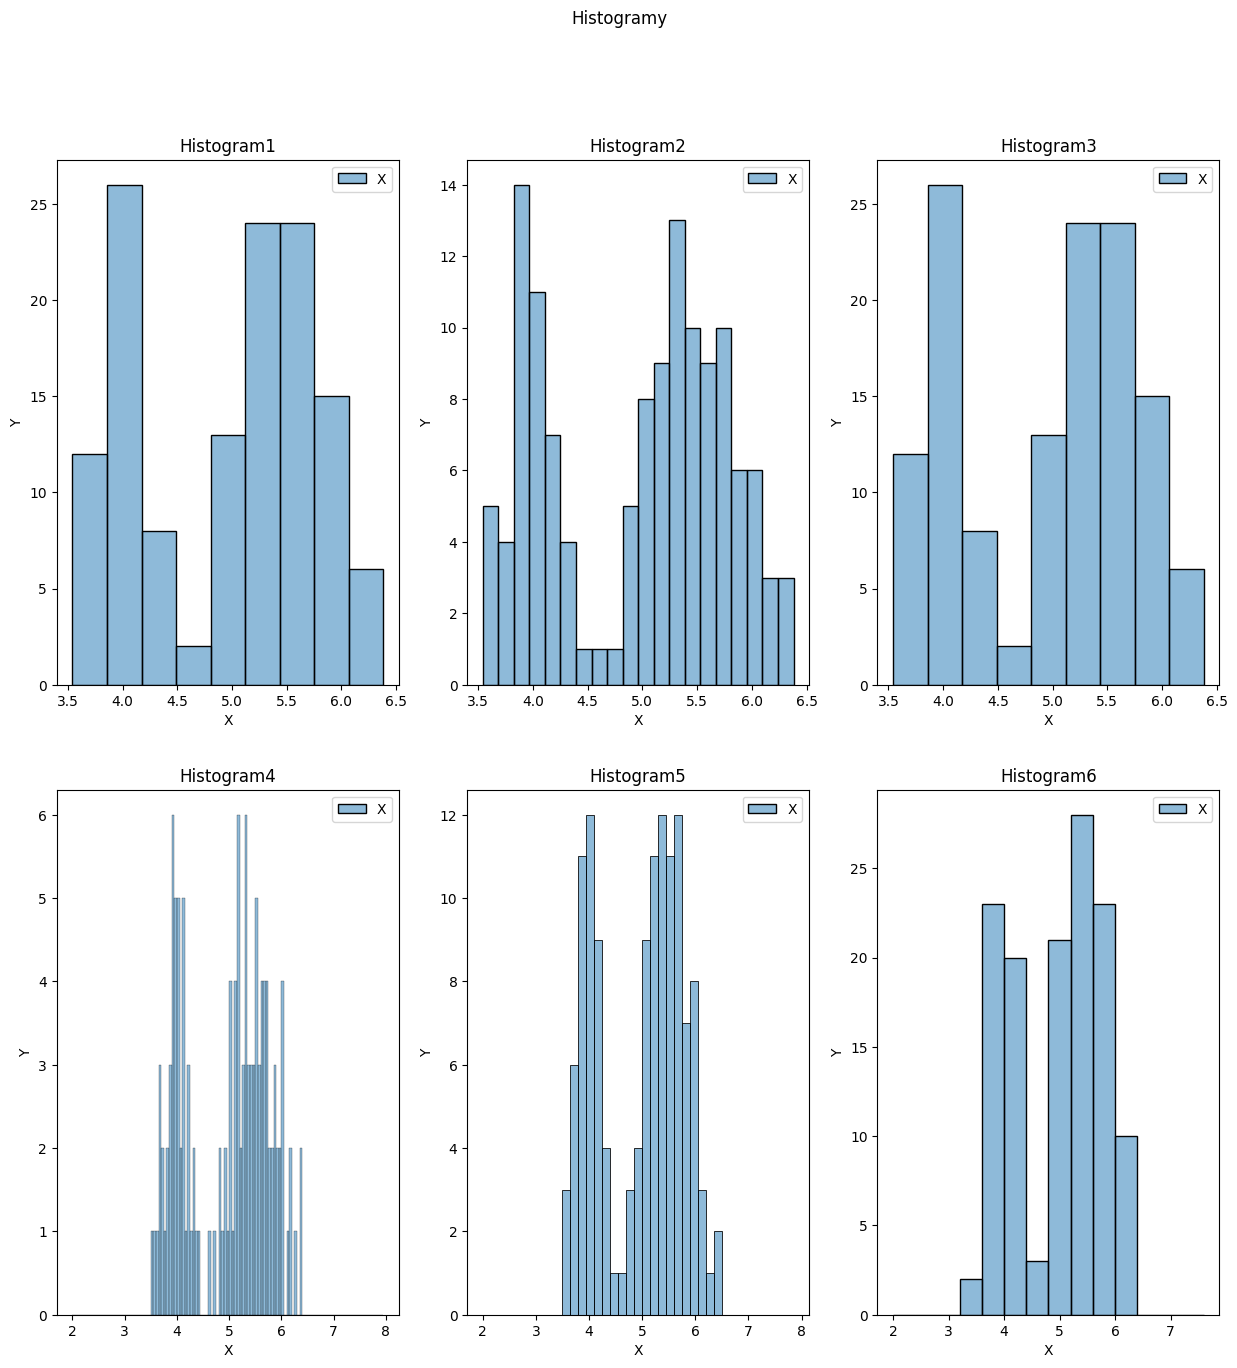

In [12]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 3, figsize=(15,15), facecolor = "white")

# pierwszy histogram
sns.histplot(sample, ax=axes[0, 0])
# drugi histogram
sns.histplot(sample, bins=20, ax=axes[0, 1])
# trzeci histogram
sns.histplot(sample, binwidth=0.3, ax=axes[0, 2])
# czwarty histogram
sns.histplot(sample, bins=np.arange(2, 8, 0.05), ax=axes[1, 0])
# piaty histogram
sns.histplot(sample, bins=np.arange(2, 8, 0.15), ax=axes[1, 1])
# szosty histogram
sns.histplot(sample, bins=np.arange(2, 8, 0.4), ax=axes[1, 2])





# tytul figury
fig.suptitle("Histogramy")
# tytuly wykresow
axes[0, 0].set_title('Histogram1')

axes[0, 1].set_title('Histogram2')
axes[0, 2].set_title('Histogram3')
axes[1, 0].set_title('Histogram4')
axes[1, 1].set_title('Histogram5')
axes[1, 2].set_title('Histogram6')

# tytuly osi wykresow
axes[0, 0].set_xlabel("X")
axes[0, 0].set_ylabel("Y")

axes[0, 1].set_xlabel("X")
axes[0, 1].set_ylabel("Y")

axes[0, 2].set_xlabel("X")
axes[0, 2].set_ylabel("Y")

axes[1, 0].set_xlabel("X")
axes[1, 0].set_ylabel("Y")

axes[1, 1].set_xlabel("X")
axes[1, 1].set_ylabel("Y")

axes[1, 2].set_xlabel("X")
axes[1, 2].set_ylabel("Y")



### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [34]:
def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
    """
    x_min = np.min(data.values)
    x_max = np.max(data.values)

    # odchylenie standardowe 
    zestaw = (x_min - 3* sigma, x_max + 3 * sigma)
    res = np.linspace(zestaw[0], zestaw[1],num=estimation_points)
    print(res)
    y = np.zeros_like(res)
   
    step = res[1] - res[0]
    
    for i, xi in enumerate(res):
        y[i] = np.sum(sp.stats.norm.pdf(data.X, loc=xi, scale=sigma))
        
    fidi = np.sum(y * step)
    
    # Standaryzacja otrzymanych wartości
    y /= fidi
    
    result = pd.DataFrame(data={'X': res, 'KDE': y})
    fig, ax = plt.subplots(figsize=(16,5))
    sns.lineplot(data=result, x="X", y="KDE", ax=ax)
    plt.fill_between(result.X.values, result.KDE.values, alpha=0.4)
    sns.scatterplot(data=sample, x="X", y=-0.01, ax=ax, marker="|", color='k')
    ax.set_title("Simple KDE estimation", weight='bold')
    return result
#simple_kde_estimation(sample, estimation_points=100, sigma=0.2)


  

[2.94233698 2.98313924 3.0239415  3.06474375 3.10554601 3.14634827
 3.18715053 3.22795279 3.26875505 3.30955731 3.35035956 3.39116182
 3.43196408 3.47276634 3.5135686  3.55437086 3.59517311 3.63597537
 3.67677763 3.71757989 3.75838215 3.79918441 3.83998667 3.88078892
 3.92159118 3.96239344 4.0031957  4.04399796 4.08480022 4.12560247
 4.16640473 4.20720699 4.24800925 4.28881151 4.32961377 4.37041603
 4.41121828 4.45202054 4.4928228  4.53362506 4.57442732 4.61522958
 4.65603183 4.69683409 4.73763635 4.77843861 4.81924087 4.86004313
 4.90084539 4.94164764 4.9824499  5.02325216 5.06405442 5.10485668
 5.14565894 5.18646119 5.22726345 5.26806571 5.30886797 5.34967023
 5.39047249 5.43127474 5.472077   5.51287926 5.55368152 5.59448378
 5.63528604 5.6760883  5.71689055 5.75769281 5.79849507 5.83929733
 5.88009959 5.92090185 5.9617041  6.00250636 6.04330862 6.08411088
 6.12491314 6.1657154  6.20651766 6.24731991 6.28812217 6.32892443
 6.36972669 6.41052895 6.45133121 6.49213346 6.53293572 6.5737

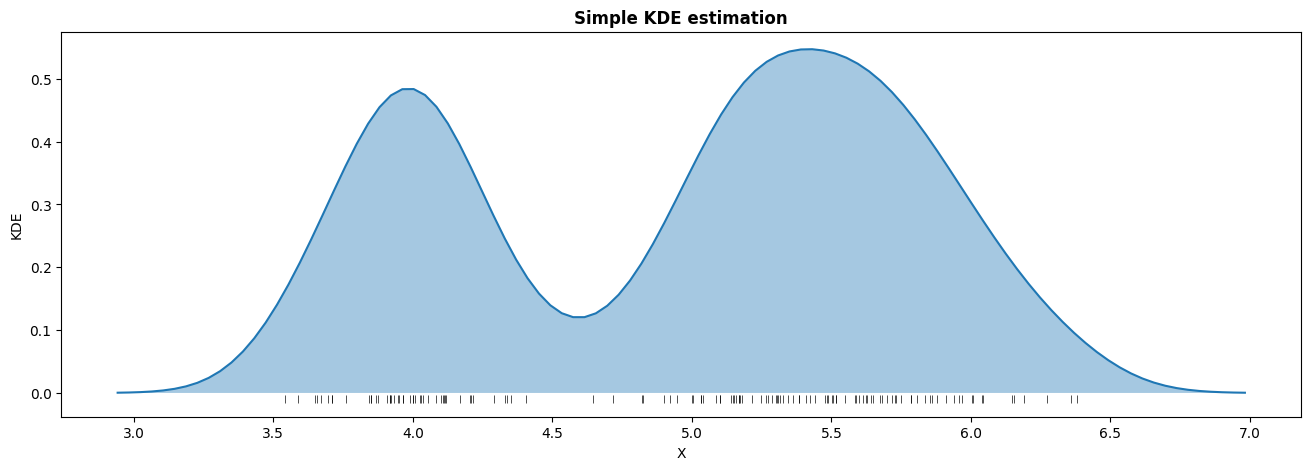

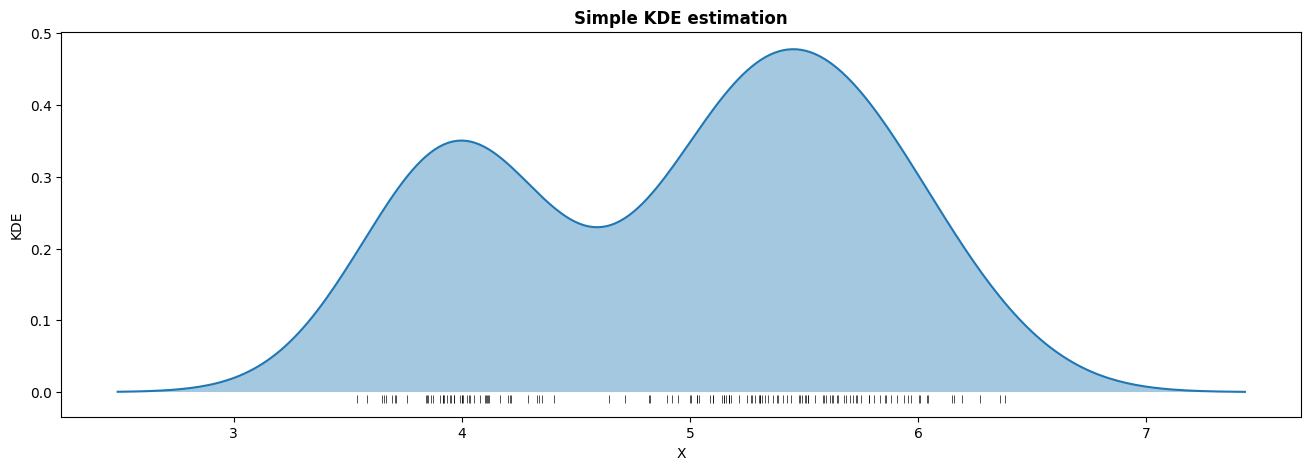

In [35]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

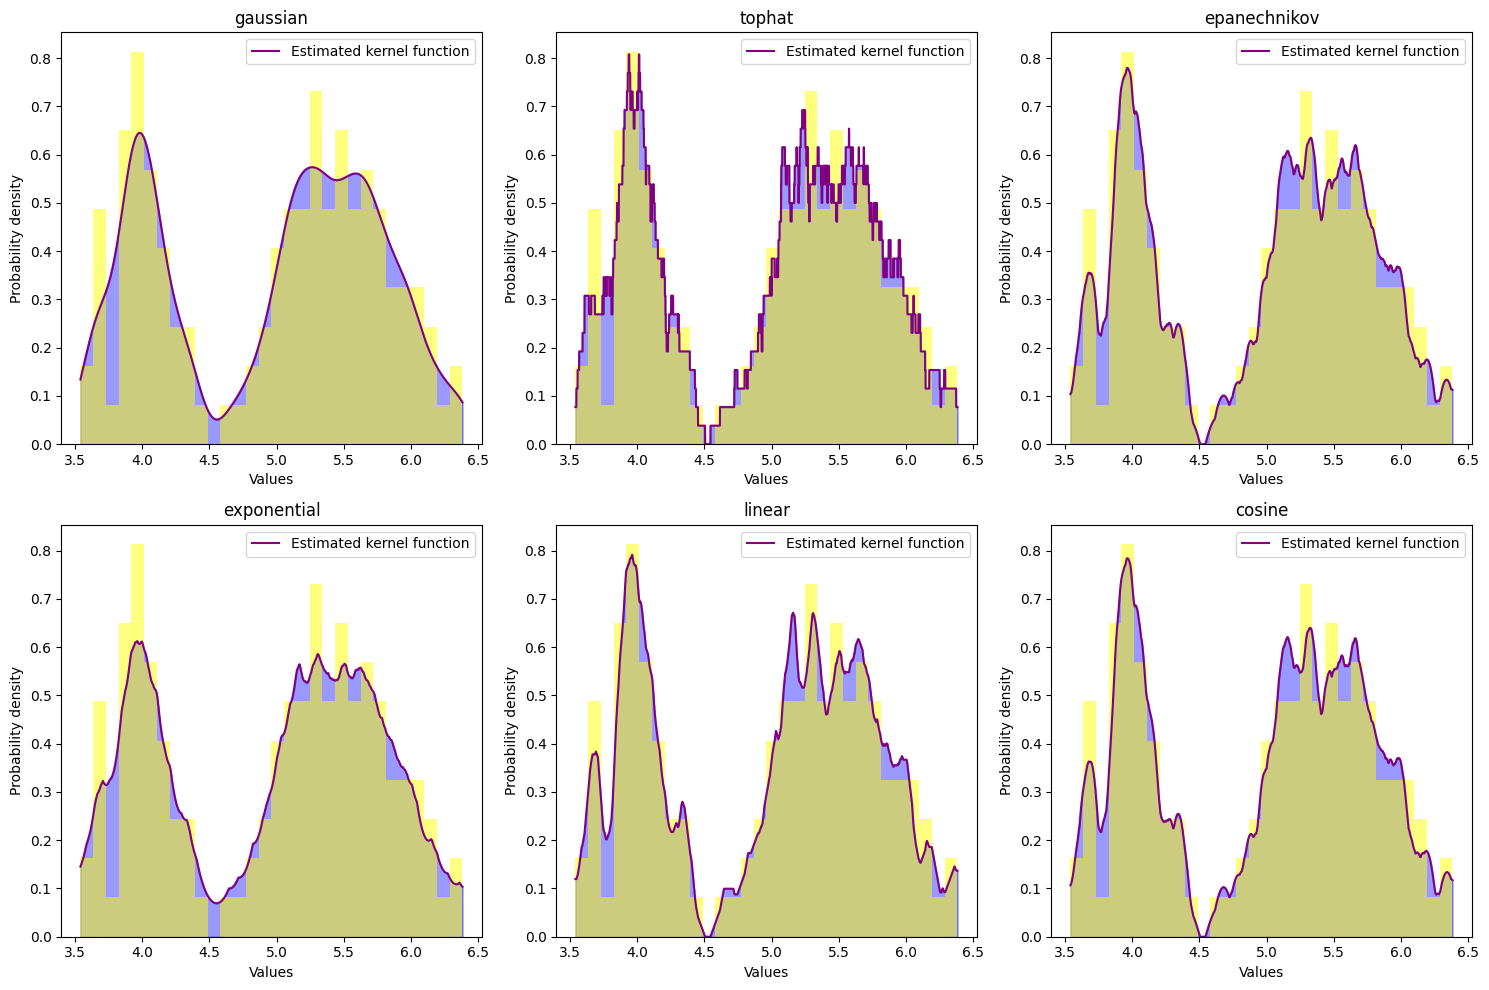

In [10]:
# Figura 1
def plot_kde(data, kernel, bandwidth, index):
    kde = KernelDensity( kernel=kernel, bandwidth=bandwidth).fit(data.reshape(-1, 1))
    x = np.linspace(data.min(), data.max(), 10000)
    log_dens = kde.score_samples(x.reshape(-1,1))
    plt.subplot(2, 3, index)
    plt.plot(x, np.exp(log_dens), color="purple", label="Estimated kernel function" )
    plt.fill_between( x, np.exp(log_dens), color="blue", alpha=0.4)
    plt.hist( data, bins=30, density=True, alpha=0.5, color="yellow")
    plt.xlabel("Values")
    plt.ylabel("Probability density")
    plt.title(f"{kernel}")
    plt.legend()
plt.figure(figsize=(15,10))
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
for index, kernel in enumerate(kernels, 1):
    plot_kde(sample.values, kernel, 0.1, index)
plt.tight_layout()
plt.show()
    

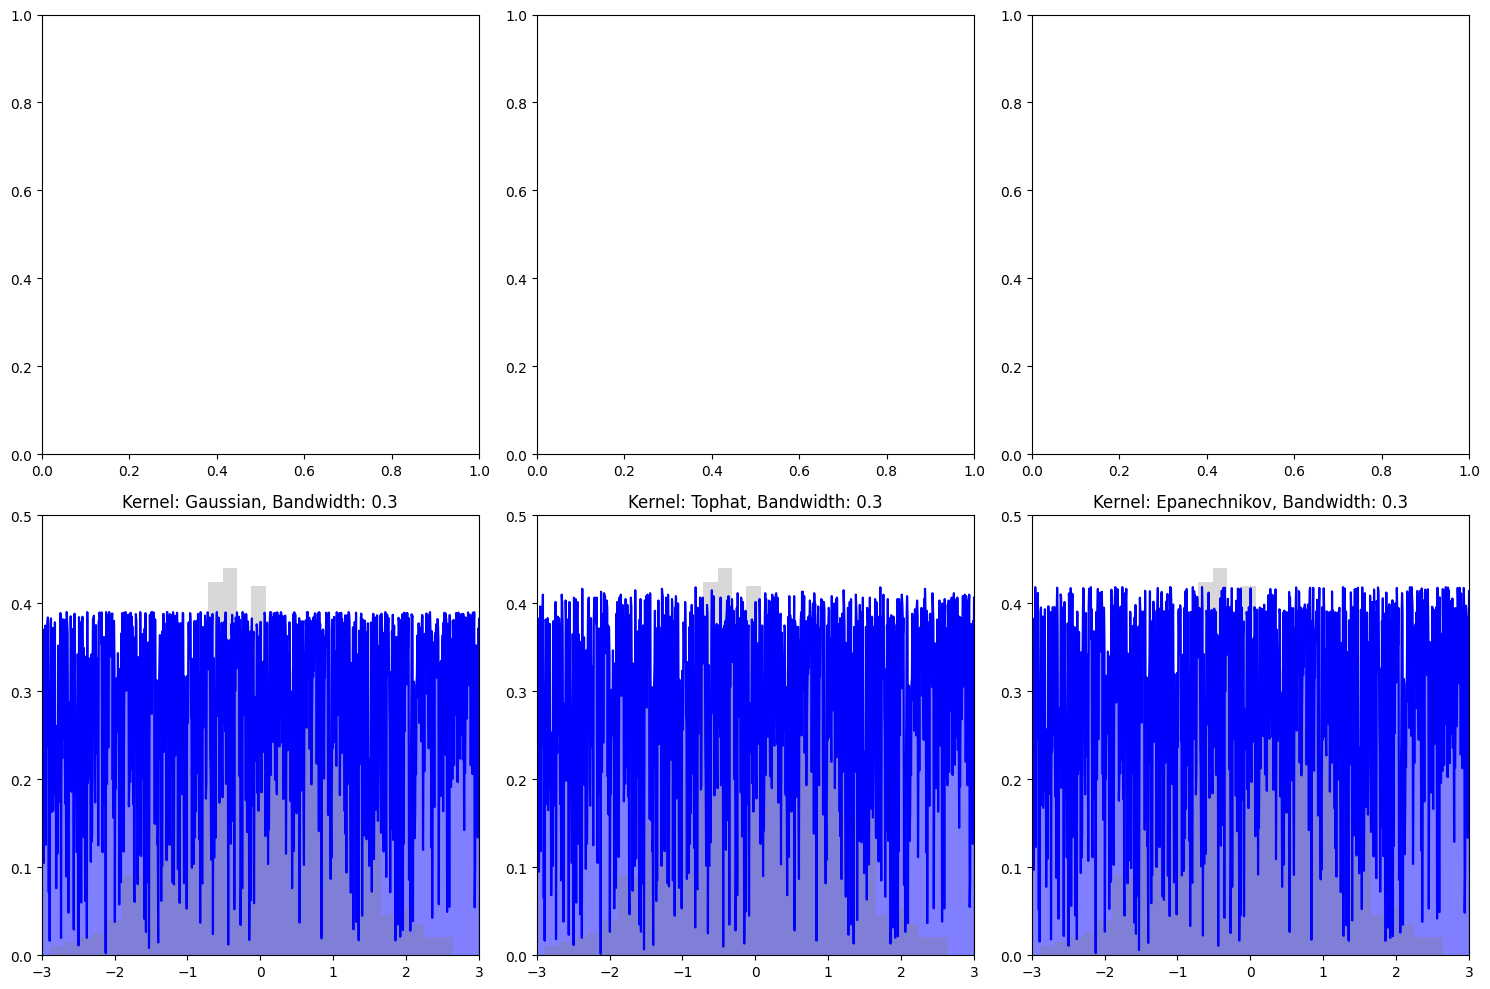

In [40]:
# Figura 2
bandwidth2 = np.linspace(0.1, len(kernels)/10, len(kernels))
plt.figure(figsize=(15, 10))
for idx, kernel in enumerate(kernels, 1):
    plot_kde(sample.values, kernel, bandwidth2[idx-1], idx) 
plt.tight_layout()
plt.show()


### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.



Figura 1: Szerokość jądra = 0.1

Plusy:
- Stała szerokość jądra pozwala łatwo porównać efekty używania różnych funkcji
- Małe jądro lepiej pokazuje drobne detale, jak na przykład małe piki w danych
  
Minusy:
- Zbyt małe jądro może sprawić, że wykres będzie wyglądał na "poszatkowany" i zbyt reagujący na każdy mały punkt danych
- Małe jądro może nie pokazać ogólnego kształtu danych, skupiając się zamiast tego na małych, przypadkowych różnicach


Figura 2: Szerokość jądra dostosowana do danych

Plusy:
- Dopasowanie szerokości jądra do danych pomaga lepiej pokazać główne cechy rozkładu
- Dobrze dobrane jądro zmniejsza ryzyko nadmiernego reagowania na pojedyncze punkty danych, ale nadal pokazuje ważne zmiany

Minusy:
- Może być trudno wybrać najlepsze jądro bez dodatkowej analizy i testowania
- Zbyt szerokie jądro może spowodować, że przeoczysz ważne drobne detale w danych


Dobór parametrów:
- Liczba przedziałów: Zbyt mało przedziałów może sprawić, że stracimy ważne cechy danych, jak różne piki. Zbyt wiele przedziałów może z kolei sprawić, że trudno będzie zobaczyć główne trendy
  
- Szerokość przedziałów: To, jak szerokie są przedziały, wpływa na to, jak gładki jest histogram. Niewłaściwa szerokość może ukryć istotne detale danych
  
- Położenie granic przedziałów: Jeśli granice przedziałów są źle ustawione, dane mogą być niewłaściwie sklasyfikowane
  
- Rodzaj jądra: Wybór funkcji jądra (np. Gaussowskie, Epanechnikov) wpływa na kształt estymacji gęstości. Różne jądra mogą lepiej pasować do różnych typów danych

- Szerokość jądra: Jest kluczowa w estymacji gęstości. Zbyt wąskie jądro może sprawić, że wykres będzie szumowaty. Zbyt szerokie może zbyt mocno wygładzić dane, tracąc ważne informacje







### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [44]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def cdf_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco wartości próby losowej,
        F_d - wartości dystrybuanty empirycznej,
        F_d_min - dolna granica przedziału ufności,
        F_d_max - górna granica przedziału ufności.
    """
    cdf = data.sort_values(by='X')
    print(cdf)
    cdf['F_d'] = np.arange(1, len(cdf) + 1) / len(cdf) 
    
    D = sp.stats.kstwo.ppf(1 - alpha, len(cdf)) 
    cdf['F_d_min'] = np.maximum(0, cdf['F_d'] - D) 
    cdf['F_d_max'] = np.minimum(1, cdf['F_d'] + D) 
    print(cdf)
    plt.plot(cdf["X"], cdf["F_d"], label="Empirical distributiona", color='red')
    plt.plot(cdf["X"], cdf["F_d_max"], color="gray", alpha=0.6)
    plt.plot(cdf["X"], cdf["F_d_min"], color="gray", alpha=0.6)
    plt.fill_between(cdf["X"], cdf["F_d_min"], cdf["F_d_max"], color="gray", alpha=0.3, label="Confidence interval")
    plt.xlabel("X")
    plt.ylabel("CDF")
    plt.title(f"Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha={alpha}")
    plt.legend()
    plt.show()
    
    return cdf

            X
27   3.542337
34   3.587117
7    3.649055
44   3.658332
32   3.669785
..        ...
100  6.154922
53   6.190435
87   6.271357
93   6.359798
74   6.381761

[130 rows x 1 columns]
            X       F_d   F_d_min   F_d_max
27   3.542337  0.007692  0.000000  0.125445
34   3.587117  0.015385  0.000000  0.133138
7    3.649055  0.023077  0.000000  0.140830
44   3.658332  0.030769  0.000000  0.148522
32   3.669785  0.038462  0.000000  0.156215
..        ...       ...       ...       ...
100  6.154922  0.969231  0.851478  1.000000
53   6.190435  0.976923  0.859170  1.000000
87   6.271357  0.984615  0.866862  1.000000
93   6.359798  0.992308  0.874555  1.000000
74   6.381761  1.000000  0.882247  1.000000

[130 rows x 4 columns]


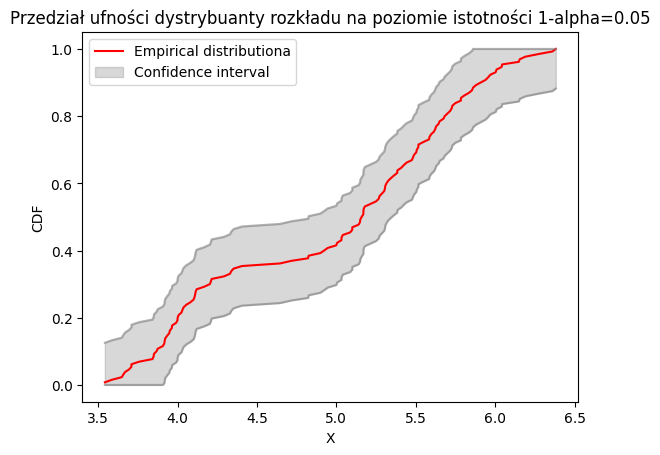

            X
27   3.542337
34   3.587117
7    3.649055
44   3.658332
32   3.669785
..        ...
100  6.154922
53   6.190435
87   6.271357
93   6.359798
74   6.381761

[130 rows x 1 columns]
            X       F_d   F_d_min   F_d_max
27   3.542337  0.007692  0.000000  0.139357
34   3.587117  0.015385  0.000000  0.147049
7    3.649055  0.023077  0.000000  0.154742
44   3.658332  0.030769  0.000000  0.162434
32   3.669785  0.038462  0.000000  0.170126
..        ...       ...       ...       ...
100  6.154922  0.969231  0.837566  1.000000
53   6.190435  0.976923  0.845258  1.000000
87   6.271357  0.984615  0.852951  1.000000
93   6.359798  0.992308  0.860643  1.000000
74   6.381761  1.000000  0.868335  1.000000

[130 rows x 4 columns]


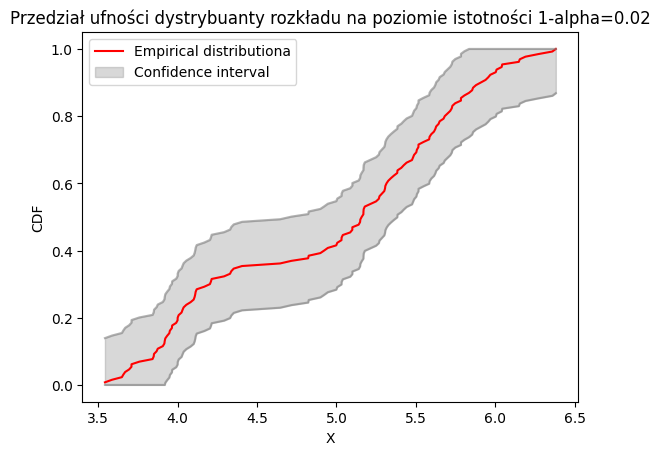

In [45]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))